In [2]:
import regex as re
import unicodedata
import pandas as pd
import os

In [3]:
# a??  dopasuj mozliwie malo
# *?
# +?
# ??
# flaga ignore case
# 1996_400 do usuniecie bo tam jakis syf
# liczba w nazwie pliku to nie jest rok

In [4]:
directory = 'ustawy'

regex_addition = re.compile(r'dodaje\ssi[eę]\s(ust\.|ust|pkt|art\.|art|§|rozdział|tiret|lit\.|lit)')
regex_removal = re.compile(r'(skreśla|uchyla)\ssię(;|:|\sart|\spkt|\sust|\s§|\srozdzial|\stiret|\slit|\.)')
regex_change = re.compile(r'otrzymuj[eą] brzmienie:')
regex_year = re.compile(r'z\sdnia\s\d+\s\w+\s(\d+)', re.IGNORECASE)

In [5]:
def count_amendments(pattern, directory, year = False):
    result = []
    for file_name in os.listdir(directory):
        file = os.path.join(directory, file_name)
        with open(file, encoding='utf-8') as f:
            lines = f.read()
            text = unicodedata.normalize('NFKC', lines)
            text = text.replace("\xa0", " ").replace("\xad", "")
            text = re.sub(r"\s+", " ", text)
            text = text.lower()
            if not year:
                n = re.findall(pattern, text)
                result.append(len(n))
            else:
                n = int(re.search(pattern, text).group(1))
                result.append(n)
    return result

In [6]:
additions = count_amendments(regex_addition, directory)
removals = count_amendments(regex_removal, directory)
changes = count_amendments(regex_change, directory)
years = count_amendments(regex_year, directory, year = True)

In [7]:
bills = pd.DataFrame(os.listdir(directory))
bills['year'] = years
bills['additions'] = additions
bills['removals'] = removals
bills['changes'] = changes
bills.columns = ['name', 'year', 'additions', 'removals', 'changes']

In [9]:
bills['additions'].sum()

6239

In [7]:
bills_yearly = bills.groupby('year').sum()
bills_yearly['total'] = bills_yearly['additions'] + bills_yearly['removals'] + bills_yearly['changes']
bills_yearly['additions_%total'] = bills_yearly['additions'] / bills_yearly['total'] * 100
bills_yearly['removals_%total'] = bills_yearly['removals'] / bills_yearly['total'] * 100
bills_yearly['changes_%total'] = bills_yearly['changes'] / bills_yearly['total'] * 100

In [8]:
bills_yearly[['additions_%total', 'removals_%total', 'changes_%total']]

,additions_%total,removals_%total,changes_%total
year,,,
1993,32.142857,7.142857,60.714286
1994,41.346154,15.865385,42.788462
1995,36.991870,12.195122,50.813008
1996,29.580348,15.455476,54.964176
1997,32.879819,13.076342,54.043840
1998,28.209459,15.033784,56.756757
1999,37.455197,12.365591,50.179211
2000,32.770503,12.405238,54.824259
2001,37.946013,11.107664,50.946323


<AxesSubplot:xlabel='year'>

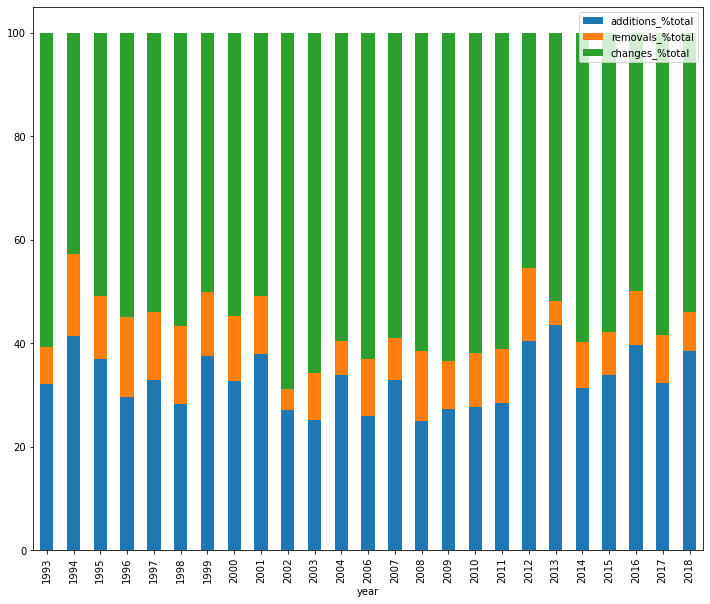

In [9]:
bills_yearly[['additions_%total', 'removals_%total', 'changes_%total']].plot.bar(stacked = True, figsize=(12, 10))

## Ustawa

In [10]:
ustawa_regex = re.compile(r'\W?usta(wa|w|wy|wom|wę|wą|wami|wie|wach|wo)\W', re.IGNORECASE)
ustawa_z_dnia_regex = re.compile(r'\W?usta(w|wa|wy|wom|wę|wą|wami|wie|wach|wo)\W(?=z\sdnia)', re.IGNORECASE)
ustawa_nie_z_dnia_regex = re.compile(r'\W?usta(w|wa|wy|wom|wę|wą|wami|wie|wach|wo)\W(?!z\sdnia)', re.IGNORECASE)

ustawa_count = count_amendments(ustawa_regex, directory)
ustawa_z_dnia_count = count_amendments(ustawa_z_dnia_regex, directory)
ustawa_nie_z_dnia_count = count_amendments(ustawa_nie_z_dnia_regex, directory)

In [11]:
print(sum(ustawa_count))
print(sum(ustawa_z_dnia_count))
print(sum(ustawa_nie_z_dnia_count))

24940
8588
16352


In [12]:
sum(ustawa_z_dnia_count + ustawa_nie_z_dnia_count) == sum(ustawa_count)

True

In [13]:
ustawa_bez_zmiany_regex = re.compile(r"(?<!o\Wzmianie\W)usta(wa|w|wy|wom|wę|wą|wami|wie|wach|wo)\W", re.IGNORECASE)
ustawa_bez_zmiany_count = count_amendments(ustawa_bez_zmiany_regex, directory)

In [14]:
sum(ustawa_bez_zmiany_count)

24074

In [15]:
ustawa_dict = {
    'ustawa_count' : sum(ustawa_count),
    'ustawa_z_dnia_count': sum(ustawa_z_dnia_count),
    'ustawa_nie_z_dnia_count': sum(ustawa_nie_z_dnia_count),
    'ustawa_bez_zmiany_count': sum(ustawa_bez_zmiany_count)
}

<BarContainer object of 4 artists>

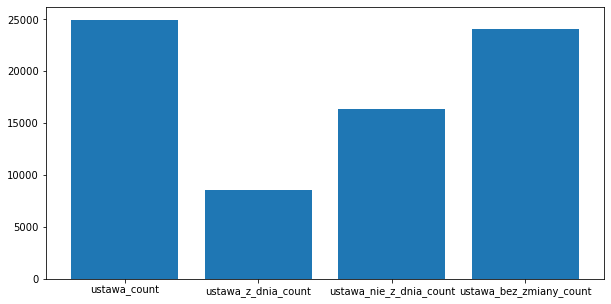

In [16]:
import matplotlib.pyplot as plt
courses = list(ustawa_dict.keys())
values = list(ustawa_dict.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(list(ustawa_dict.keys()), list(ustawa_dict.values()))